# Libraries Import
Here, we will import essential libraries for data wrangling. Others will be imported later as needed

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Dataset Loading Into Environment

In [2]:
df = pd.read_csv('movies.csv', encoding = "ISO-8859-1")
# Explore the 1st 5 rows of dataset
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [3]:
df.describe()

,budget,gross,runtime,score,votes,year
count,6.820000e+03,6.820000e+03,6820.00000,6820.000000,6.820000e+03,6820.000000
mean,2.458113e+07,3.349783e+07,106.55132,6.374897,7.121952e+04,2001.000293
std,3.702254e+07,5.819760e+07,18.02818,1.003142,1.305176e+05,8.944501
min,0.000000e+00,7.000000e+01,50.00000,1.500000,2.700000e+01,1986.000000
25%,0.000000e+00,1.515839e+06,95.00000,5.800000,7.665250e+03,1993.000000
50%,1.100000e+07,1.213568e+07,102.00000,6.400000,2.589250e+04,2001.000000
75%,3.200000e+07,4.006534e+07,115.00000,7.100000,7.581225e+04,2009.000000
max,3.000000e+08,9.366622e+08,366.00000,9.300000,1.861666e+06,2016.000000


In [4]:
# Check the number of Nans
df.isnull().sum()

budget      0
company     0
country     0
director    0
genre       0
gross       0
name        0
rating      0
released    0
runtime     0
score       0
star        0
votes       0
writer      0
year        0
dtype: int64

In [3]:
# There are zero Nans or nulls
# According to the dataset description, there are some movies with unknown budgets given as 0, let's count how many of them
df.budget[df.budget==0].count()

2182

In [4]:
# There are about 2200 movies with missing budgets. Let's input median budget in those instead
df.budget = df.budget.replace(0, np.median(df.budget))
# Check 0 budgets again
df.budget[df.budget==0].count()

0

In [5]:
df.shape

(6820, 15)

In [4]:
# Checking if there are values of different types in columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6820 entries, 0 to 6819
Data columns (total 15 columns):
budget      6820 non-null float64
company     6820 non-null object
country     6820 non-null object
director    6820 non-null object
genre       6820 non-null object
gross       6820 non-null float64
name        6820 non-null object
rating      6820 non-null object
released    6820 non-null object
runtime     6820 non-null int64
score       6820 non-null float64
star        6820 non-null object
votes       6820 non-null int64
writer      6820 non-null object
year        6820 non-null int64
dtypes: float64(3), int64(3), object(9)
memory usage: 799.3+ KB


It seems like all the columns are homogenous in data type. 'released' column had type String object, although it seems convertible to datetime object. To make this column ready and useful for future analysis, we'll have to split it into year, month and day columns. We can do this by first converting it to pandas' datetime object and use its attributes to extract year, month, and day

In [18]:
df['released'] = pd.to_datetime(df.released)
for i in range(len(df)):
  df.loc[i, 'release_year'] = df.released[i].year
  df.loc[i, 'release_month'] = df.released[i].month
  df.loc[i, 'release_day'] = df.released[i].day

# Now we can drop 'released' column
df = df.drop('released', axis=1)

# Check head of the dataframe

df.head()

,budget,company,country,director,genre,gross,name,rating,runtime,score,star,votes,writer,year,release_year,release_month,release_day
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,89,8.1,Wil Wheaton,299174,Stephen King,1986,1986.0,8.0,22.0
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,103,7.8,Matthew Broderick,264740,John Hughes,1986,1986.0,6.0,11.0
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,110,6.9,Tom Cruise,236909,Jim Cash,1986,1986.0,5.0,16.0
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,137,8.4,Sigourney Weaver,540152,James Cameron,1986,1986.0,7.0,18.0
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,1986.0,8.0,1.0


Also, we can see that 'year' and 'release_year' columns seem identical. They may represent different years like the year when the movie was released vs the year it was made. Let's check if they are identical in order to drop one of them if so. First, let's check the fraction of them that's equal

In [20]:
np.sum(df.year == df.release_year)/len(df)

0.7819648093841642

That is, about 78% of the movies had similar 'release_year' and 'year' values. Now let's see if the ones that aren't equal drastically differ from each other 

In [27]:
df['year_diff'] = np.abs(df.release_year - df.year)
df[df.year !=df.release_year].loc[:, ['name', 'year', 'release_year', 'year_diff']].sort_values('year_diff', ascending=False)\
                                                                                                .head(10)

,name,year,release_year,year_diff
1184,Only Yesterday,1991,2016.0,25.0
588,As Tears Go By,1988,2008.0,20.0
2408,A Summer's Tale,1996,2014.0,18.0
476,The Last Temptation of Christ,1988,2004.0,16.0
812,Violent Cop,1989,1999.0,10.0
1050,Boiling Point,1990,1999.0,9.0
1691,Iron Monkey,1993,2001.0,8.0
4155,Eating Out,2004,2012.0,8.0
1239,The Lovers on the Bridge,1991,1999.0,8.0
1449,Twin Dragons,1992,1999.0,7.0


That is, there is up to 25 years difference between movies' make year and release year. Since there is significant differences between some movies' release and make years, we will not drop any of their respective columns

Next, we will check for outliers. We are going to do this by creating histogram for each column. Since budget, gross, and runtime columns are not categorical or bounded by certain range (open ended), their histograms will be selected to detect outliers

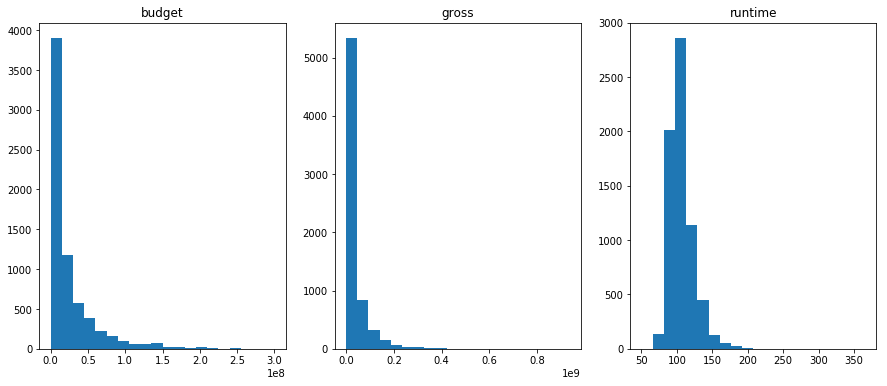

In [29]:
# to check for outliers, we are going to create histograms for each numerical column
bins = len(df)
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.hist(df.budget, bins=20)
plt.title('budget')

plt.subplot(1, 3, 2)
plt.hist(df.gross, bins=20)
plt.title('gross')

plt.subplot(1, 3, 3)
plt.hist(df.runtime, bins=20)
plt.title('runtime')


plt.show()

It seems like most movies in the dataset had budgets below 100M, grosses below 200M, and runtimes between 75 to 150 minutes. Movies with extremely high budgets, grosses, and runtimes can be considered as outliers, therefore can be dropped. The threshold that will be used here is 95% percentile. If the movie had values below 2.5% or above 97.5% percentiles, it will be dropped.

In [34]:
min_budget, max_budget = np.percentile(df.budget, [2.5, 97.5])
df = df[(df.budget>min_budget) & (df.budget<max_budget)]

min_gross, max_gross = np.percentile(df.gross, [2.5, 97.5])
df = df[(df.gross>min_gross) & (df.gross<max_gross)]

min_runtime, max_runtime = np.percentile(df.runtime, [2.5, 97.5])
df = df[(df.runtime>min_runtime) & (df.runtime<max_runtime)]

# checking the shape after eliminating outliers
df.shape

(5449, 18)

About 80% of the original number of movies remained after eliminating outliers